<a href="https://colab.research.google.com/github/nntu079/LSTM-COVID19/blob/main/LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY
from tensorflow import keras

from numpy import array 
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n_steps=14;
n_features=5;


In [ ]:
#DATA FRANCE
time=["Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17","Mar 18","Mar 19","Mar 20","Mar 21","Mar 22","Mar 23","Mar 24","Mar 25","Mar 26","Mar 27","Mar 28","Mar 29","Mar 30","Mar 31","Apr 01","Apr 02","Apr 03","Apr 04","Apr 05","Apr 06","Apr 07","Apr 08","Apr 09","Apr 10","Apr 11","Apr 12","Apr 13","Apr 14","Apr 15","Apr 16","Apr 17","Apr 18","Apr 19","Apr 20","Apr 21","Apr 22","Apr 23","Apr 24","Apr 25","Apr 26","Apr 27","Apr 28","Apr 29","Apr 30","May 01","May 02","May 03","May 04","May 05","May 06","May 07","May 08","May 09","May 10","May 11","May 12","May 13","May 14","May 15","May 16","May 17","May 18","May 19","May 20","May 21","May 22","May 23","May 24","May 25","May 26","May 27","May 28","May 29","May 30","May 31","Jun 01","Jun 02","Jun 03","Jun 04","Jun 05","Jun 06","Jun 07","Jun 08","Jun 09","Jun 10","Jun 11","Jun 12","Jun 13","Jun 14","Jun 15","Jun 16","Jun 17","Jun 18","Jun 19","Jun 20","Jun 21","Jun 22","Jun 23","Jun 24","Jun 25","Jun 26","Jun 27","Jun 28","Jun 29","Jun 30","Jul 01","Jul 02","Jul 03","Jul 04","Jul 05","Jul 06","Jul 07","Jul 08","Jul 09","Jul 10","Jul 11","Jul 12","Jul 13","Jul 14","Jul 15","Jul 16","Jul 17","Jul 18","Jul 19","Jul 20","Jul 21","Jul 22","Jul 23","Jul 24","Jul 25","Jul 26","Jul 27","Jul 28","Jul 29"]
total_case= [12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,212,285,423,653,949,1209,1412,1784,2281,2876,3661,4499,5423,6633,7730,9134,10995,12612,14459,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,68605,70478,74390,78167,82048,86334,90676,93790,95403,98076,103573,106206,108847,109252,111821,112606,114657,117324,119151,120804,122577,124114,124575,128339,129859,128442,129581,130185,130979,131287,131863,132967,137150,137779,138421,138854,139063,139519,140227,140734,141356,141919,142291,142411,142903,143427,143845,144163,144556,144806,144921,145279,145555,145746,149071,149668,151496,151753,152091,151325,151677,152444,153055,153634,153977,154188,154591,155136,155561,156287,156813,157220,157372,157716,158174,158641,159452,160093,160377,160750,161267,161348,161348,162936,163458,163980,164260,164801,165719,166378,166960,167520,168159,168335,168810,169473,170094,170752,171421,172089,172377,172888,173304,173838,174674,175539,176404,176754,177338,178336,179398,180528,181547,182565,183079,183804,185196] 
new_cases=[0,0,0,0,0,0,0,0,0,0,2,4,20,19,43,30,61,21,73,138,230,296,260,203,372,497,595,785,838,924,1210,1097,1404,1861,1617,1847,1559,3838,2448,2929,3922,3809,4611,2599,4376,7578,4861,2116,5233,4267,1873,3912,3777,3881,4286,4342,3114,1613,2673,5497,2633,2641,405,2569,785,2051,2667,1827,1653,1773,1537,461,3764,1520,-1417,1139,604,794,308,576,1104,4183,629,642,433,209,456,708,507,622,563,372,120,492,524,418,318,393,250,115,358,276,191,3325,597,1828,257,338,-766,352,767,611,579,343,211,403,545,425,726,526,407,152,344,458,467,811,641,284,373,517,81,0,1588,522,522,280,541,918,659,582,560,639,176,475,663,621,658,669,668,288,511,416,534,836,865,865,350,584,998,1062,1130,1019,1018,514,725,1392]          
currently_infected=[7,7,6,4,4,4,4,1,1,0,2,5,25,44,86,116,176,196,269,404,632,921,1178,1370,1739,2221,2803,3570,4396,5284,6473,6953,8268,9328,10575,12310,13144,16796,17923,20002,22511,25269,29561,30366,33599,39162,42024,41293,43827,45612,46223,48236,48510,49934,50929,52559,53580,53837,55404,59053,58099,58131,56168,56533,56328,57002,57367,57175,56882,56861,56928,56838,59556,59336,56151,55753,55403,55681,55632,55315,54724,57393,56789,56433,56530,56490,56176,55475,55011,54350,53966,53624,53115,52961,52867,52384,52115,52083,51952,51962,51673,51171,50591,53243,53176,54482,54621,54843,53598,53226,53428,53465,53711,54005,53942,53814,54010,54091,54366,54632,54979,54917,54859,54957,55176,55743,56173,56390,56500,56701,56515,56270,57832,58048,58561,58823,58709,59344,59726,60032,60485,61098,61132,61247,61548,61970,62385,63050,63715,63776,64143,64389,64689,65314,66170,67027,67369,67439,68207,68744,69521,70536,71550,71788,72270,73647] 
total_deaths=[1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,4,7,9,16,19,30,33,48,61,79,91,127,148,175,264,372,450,562,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660,24087,24376,24594,24760,24895,25201,25531,25809,25987,26230,26310,26380,26643,26991,27074,27425,27529,27625,28108,28239,28022,28132,28215,28289,28332,28367,28432,28530,28596,28662,28714,28771,28802,28833,28940,29021,29065,29111,29142,29155,29209,29296,29319,29346,29374,29398,29407,29436,29547,29575,29603,29617,29633,29640,29663,29720,29731,29752,29778,29786,29795,29813,29843,29861,29875,29893,29900,29907,29920,29933,29965,29979,30004] 
total_deaths=[1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,4,7,9,16,19,30,33,48,61,79,91,127,148,175,264,372,450,562,674,860,1100,1331,1696,1995,2314,2606,3024,3522,4030,5384,6503,7555,8072,8904,10320,10860,12199,13185,13819,14380,14954,15715,17152,17904,18664,19305,19700,20246,20776,21319,21834,22223,22592,22834,23270,23637,24063,24352,24570,24736,24871,25177,25507,25785,25963,26206,26286,26356,26619,26967,27050,27401,27505,27601,28083,28214,27997,28107,28190,28264,28307,28342,28407,28505,28571,28637,28689,28746,28777,28808,28915,28996,29040,29086,29117,29130,29184,29271,29294,29321,29349,29373,29382,29411,29522,29550,29578,29592,29608,29615,29638,29695,29706,29727,29753,29761,29770,29788,29818,29836,29850,29868,29875,29882,29895,29908,29940,29954,29979,29983,29986,30004,30075,30095,30113,30127,30136,30144,30152,30165,30172,30182,30192,30196,30200,30209,30223,30238] 
new_deaths=[1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,3,2,7,3,11,3,15,13,18,12,36,21,27,89,108,78,112,112,186,240,231,365,299,319,292,418,498,508,1354,1119,1052,517,832,1416,540,1339,986,634,561,574,761,1437,752,760,641,395,546,530,543,515,389,369,242,436,367,426,289,218,166,135,306,330,278,178,243,80,70,263,348,83,351,104,96,482,131,-217,110,83,74,43,35,65,98,66,66,52,57,31,31,107,81,44,46,31,13,54,87,23,27,28,24,9,29,111,28,28,14,16,7,23,57,11,21,26,8,9,18,30,18,14,18,7,7,13,13,32,14,25,4,3,18,71,20,18,14,9,8,8,13,7,10,10,4,4,9,14,15]            
new_recoveries=[0,0,1,2,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,590,0,693,292,0,613,0,1081,619,1048,752,0,1502,725,1517,1491,1493,1580,1430,745,1067,2087,1917,1952,1726,1459,795,532,1087,2150,1857,1608,1563,595,831,1772,1476,1431,1405,1101,309,610,1373,1342,1248,736,350,222,587,1365,1236,1055,755,256,179,507,1061,888,932,843,618,147,515,835,791,504,351,338,70,582,680,705,607,612,465,87,85,372,643,521,528,302,36,220,444,326,317,423,236,51,185,291,332,220,230,195,60,240,259,256,224,0,298,0,0,625,265,263,258,100,19,129,347,330,185,218,0,0,209,73,150,216,197,0,0,0,501,223,515,343,0,0,267,229,0]
P=65273512; # population

total_case_arr=np.array(total_case)
total_current_infected_arr=np.array(currently_infected)
total_deaths_arr=np.array(total_deaths)
total_recover_arr= total_case_arr-total_deaths_arr-total_current_infected_arr
total_susceptible_arr=P-total_current_infected_arr-total_recover_arr-total_deaths_arr
new_cases_arr= array(new_cases)

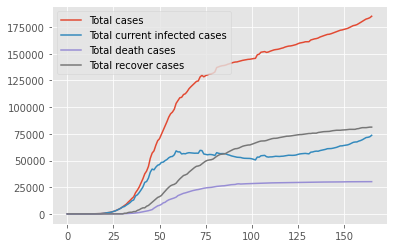

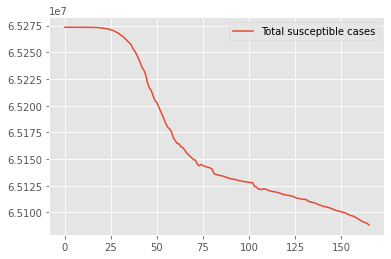

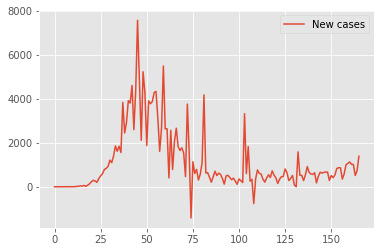

In [ ]:
#VISUALIZE
plt.plot(total_case_arr, label='Total cases')
plt.plot(total_current_infected_arr,label='Total current infected cases')
plt.plot(total_deaths_arr,label='Total death cases')
plt.plot(total_recover_arr,label='Total recover cases')
plt.legend()
plt.show()

plt.plot(total_susceptible_arr,label='Total susceptible cases')
plt.legend()
plt.show()

plt.plot(new_cases_arr,label='New cases')
plt.legend()
plt.show()


In [ ]:
#BUILD MODEL
# Build the model
def create_LSTM(n_steps,n_features):
  model = Sequential()
  model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(LSTM(100, activation='relu'))

  model.add(Dense(n_features))

  optimizer = Adam(lr=0.0001)
  model.compile(optimizer, loss='mse',metrics=['mse'])
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  print('Long Short-Term Memory networks Summary: ')
  print(model.summary())
  
  return model;

In [ ]:
#FUNCTION 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
def plot_history(history):
  #acc = history.history['mse']
  #val_acc = history.history['val_mse']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(loss) + 1)
  #plt.figure(figsize=(12, 5))
  #plt.subplot(1, 2, 1)
  #plt.plot(x, acc, 'b', label='Training mse')
  #plt.plot(x, val_acc, 'r', label='Validation mse')
  #plt.title('Training and validation mse')
  #plt.legend()
  #plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def predict_nstep(model,data_input,nsteps_output):
  data_input=np.copy(data_input.reshape((1,data_input.shape[0],data_input.shape[1])))
  output=[]

  for j in range(0,nsteps_output):
    temp=model.predict(data_input)[0]
    output.append(temp)
    for i in range(0,n_steps-1):
      data_input[0][i]=data_input[0][i+1]
    data_input[0][n_steps-1]=temp
  return np.array(output)

def predict(model,data_input,nsteps_output):
  X,y=split_sequences(data_input,n_steps);
  l=len(X);
  output=[];
  for i in range(0,l):
    output.append(predict_nstep(model,X[i],nsteps_output)[-1])
  return np.array(output)

In [ ]:
#SPLIT DATA

# convert to [rows, columns] structure
total_case_arr = total_case_arr.reshape((len(total_case_arr), 1))
total_current_infected_arr = total_current_infected_arr.reshape((len(total_current_infected_arr), 1))
total_deaths_arr = total_deaths_arr.reshape((len(total_deaths_arr), 1))
total_recover_arr = total_recover_arr.reshape((len(total_recover_arr), 1))
total_susceptible_arr = total_susceptible_arr.reshape((len(total_susceptible_arr), 1))

dataset = hstack((total_case_arr, total_current_infected_arr, total_deaths_arr,total_recover_arr,total_susceptible_arr))

scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(dataset)

dataset=scaler.transform(dataset)

dataset_train,dataset_test=train_test_split(dataset,shuffle=False,test_size=0.2)

x_train, y_train = split_sequences(dataset_train, n_steps)
x_test,y_test=split_sequences(dataset_test,n_steps)

Long Short-Term Memory networks Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 100)           42400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 123,305
Trainable params: 123,305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/700
4/4 [==============================] - 0s 108ms/step - loss: 0.4582 - mse: 0.4582 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 2/700
4/4 [==============================] - 0s 26ms/step - loss: 0.4432 - mse: 0.4432 - val_loss: 0.7986 - val_mse: 0.7986
Epoch 3/700
4/4 [==============================] - 0s 24ms/step - loss: 

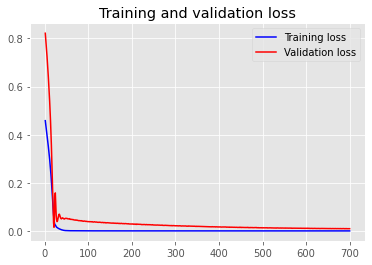

In [ ]:
#TRAIN MODEL
model=create_LSTM(n_steps,n_features);

history=model.fit(x_train, y_train, epochs=700, verbose=1,validation_data=(x_test, y_test))
plot_history(history)

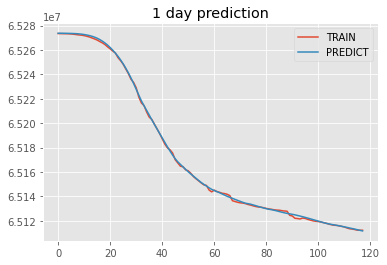

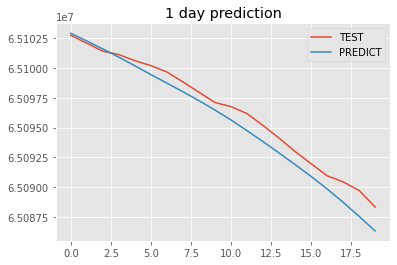

In [ ]:
#PREDICT
#model.save('model1.h5')
#model=keras.models.load_model('/content/drive/My Drive/COVID-19/Code/LSTM-COVID19/model1.h5')
#Predict 1 step
n_step_output=1
data_input_test=np.copy(dataset_test)
data_input_train=np.copy(dataset_train)

y_predict_train=predict(model,data_input_train,n_step_output)
y_predict_test=predict(model,data_input_test,n_step_output)

y_train_visualize=data_input_train[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_train_visualize)[:,4],label='TRAIN')
plt.plot(scaler.inverse_transform(y_predict_train)[:,4],label="PREDICT")
plt.legend()
plt.title('1 day prediction')
plt.show()

y_test_visualize=data_input_test[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_test_visualize)[:,4],label='TEST')
plt.plot(scaler.inverse_transform(y_predict_test)[:,4],label="PREDICT")
plt.legend()
plt.title('1 day prediction')
plt.show()

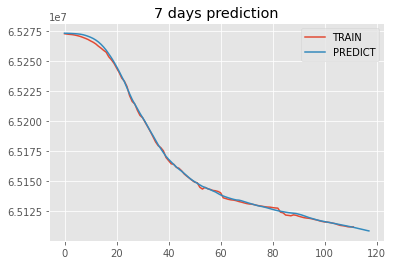

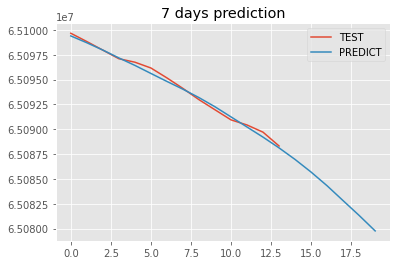

In [ ]:
#Predict 1 step
n_step_output=7
data_input_test=np.copy(dataset_test)
data_input_train=np.copy(dataset_train)

y_predict_train=predict(model,data_input_train,n_step_output)
y_predict_test=predict(model,data_input_test,n_step_output)

y_train_visualize=data_input_train[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_train_visualize)[:,4],label='TRAIN')
plt.plot(scaler.inverse_transform(y_predict_train)[:,4],label="PREDICT")
plt.legend()
plt.title('7 days prediction')
plt.show()

y_test_visualize=data_input_test[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_test_visualize)[:,4],label='TEST')
plt.plot(scaler.inverse_transform(y_predict_test)[:,4],label="PREDICT")
plt.legend()
plt.title('7 days prediction')
plt.show()

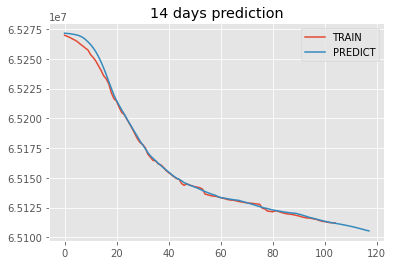

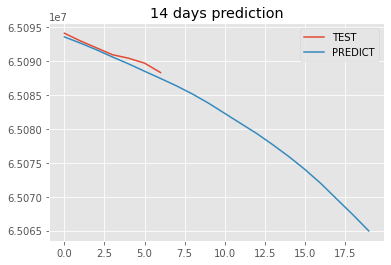

In [ ]:
#Predict 1 step
n_step_output=14
data_input_test=np.copy(dataset_test)
data_input_train=np.copy(dataset_train)

y_predict_train=predict(model,data_input_train,n_step_output)
y_predict_test=predict(model,data_input_test,n_step_output)

y_train_visualize=data_input_train[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_train_visualize)[:,4],label='TRAIN')
plt.plot(scaler.inverse_transform(y_predict_train)[:,4],label="PREDICT")
plt.legend()
plt.title('14 days prediction')
plt.show()

y_test_visualize=data_input_test[13+n_step_output:]

plt.plot(scaler.inverse_transform(y_test_visualize)[:,4],label='TEST')
plt.plot(scaler.inverse_transform(y_predict_test)[:,4],label="PREDICT")
plt.legend()
plt.title('14 days prediction')
plt.show()

In [ ]:
#TRAIN MODEL
model=create_LSTM(n_steps,n_features);

x_train_2,y_train_2=split_sequences(dataset,n_steps)

history=model.fit(x_train_2, y_train_2, epochs=700, verbose=1)

#plot_history(history)

Long Short-Term Memory networks Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 100)           42400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 123,305
Trainable params: 123,305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/700
5/5 [==============================] - 0s 20ms/step - loss: 0.5101 - mse: 0.5101
Epoch 2/700
5/5 [==============================] - 0s 18ms/step - loss: 0.4946 - mse: 0.4946
Epoch 3/700
5/5 [==============================] - 0s 19ms/step - loss: 0.4794 - mse: 0.4794
Epoch 4/700
5/5 [==============================] - 0

In [ ]:
#model.save('model2.h5')
#model=keras.models.load_model('/content/drive/My Drive/COVID-19/Code/LSTM-COVID19/model2.h5')


Total case, total infected, total deaths, total recover, total suseptible
[[ 1.86087672e+05  7.47555078e+04  3.01393691e+04  8.14150234e+04
   6.50873320e+07]
 [ 1.87293656e+05  7.58104766e+04  3.01357188e+04  8.15854297e+04
   6.50861120e+07]
 [ 1.88556016e+05  7.69358438e+04  3.01289824e+04  8.17474219e+04
   6.50848160e+07]
 [ 1.89902531e+05  7.81477266e+04  3.01218652e+04  8.19103906e+04
   6.50834400e+07]
 [ 1.91335828e+05  7.94457266e+04  3.01163770e+04  8.20755312e+04
   6.50819480e+07]
 [ 1.92957656e+05  8.09064297e+04  3.01203242e+04  8.22582266e+04
   6.50802680e+07]
 [ 1.94773969e+05  8.25448750e+04  3.01293457e+04  8.24455078e+04
   6.50784040e+07]
 [ 1.96761516e+05  8.43694922e+04  3.01330898e+04  8.26493047e+04
   6.50762960e+07]
 [ 1.98936234e+05  8.63789297e+04  3.01380859e+04  8.28516797e+04
   6.50739600e+07]
 [ 2.01337594e+05  8.86269844e+04  3.01376816e+04  8.30721016e+04
   6.50713400e+07]
 [ 2.04001250e+05  9.11569453e+04  3.01281973e+04  8.33366094e+04
   6.50683

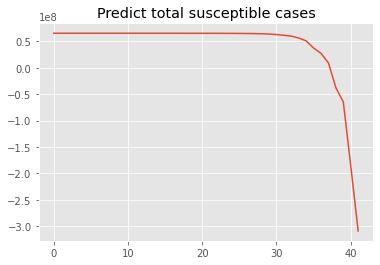

In [ ]:
data_input=np.copy(dataset[-14:])


def get_output_nstep(data_input,nsteps_output,model):
  data_input=data_input.reshape((1,data_input.shape[0],data_input.shape[1]))
  output=[]

  for j in range(0,nsteps_output):
    temp=model.predict(data_input)[0]
    output.append(temp)
    for i in range(0,n_steps-1):
      data_input[0][i]=data_input[0][i+1]
    data_input[0][n_steps-1]=temp
  return np.array(output)

rs=scaler.inverse_transform(get_output_nstep(data_input,42,model))

print('Total case, total infected, total deaths, total recover, total suseptible')
print(rs)


plt.title('Predict total susceptible cases')
plt.plot(rs[:,4])
plt.show()

In [ ]:
print('De ket luan khi nao het benh ta xet tong so nguoi co kha nang nhiem benh (total susceptible cases) \nkhi so truong hop tro ve 0 hoac chuyen sang trai thai hap thu')

count=0;
for i in range(len(rs[:,4])):
  count=count+1;
  if(rs[:,4][i]==rs[:,4][i+1] or rs[:,4][i]<0):
    break;
print('Dua vao so lieu du doan thi sau ',count,'ngay nua se het dich ke tu thoi diem cua data dang xet')

De ket luan khi nao het benh ta xet tong so nguoi co kha nang nhiem benh (total susceptible cases) 
khi so truong hop tro ve 0 hoac chuyen sang trai thai hap thu
Dua vao so lieu du doan thi sau  39 ngay nua se het dich ke tu thoi diem cua data dang xet
